In [1]:
import torch
import torch.nn as nn
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n_dim = 64
device = 'cpu'

In [3]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28), title=""):
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.title(title)
    # plt.figure(figsize=())
    plt.show();

def get_noise(batch_size, n_dim, device):
    return torch.randn(batch_size, n_dim, device=device)

In [4]:
class Generator(nn.Module):
    def __init__(self, n_dim=10, h_dim=128, im_dim=784):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            self.gen_block(n_dim, h_dim),
            self.gen_block(h_dim, h_dim*2),
            self.gen_block(h_dim*2, h_dim*4),
            self.gen_block(h_dim*4, h_dim*8),
            nn.Linear(h_dim*8, im_dim),
            nn.Sigmoid()
        )
    
    def gen_block(self, in_dim, out_dim):
        return nn.Sequential(
            nn.Linear(in_dim, out_dim),
            nn.BatchNorm1d(out_dim),
            nn.ReLU(inplace=True)
        )

    def forward(self, noise):
        return self.gen(noise)

    def get_gen(self):
        return self.gen

In [5]:
gen = Generator(n_dim=64).to(device)
gen.load_state_dict(torch.load("generator1.pth"))

<All keys matched successfully>

In [6]:
def generate_digits(gen=gen, n_dim=n_dim, device=device, num_images=25):
    noise = get_noise(num_images, n_dim, device)
    fake = gen(noise)
    show_tensor_images(fake, num_images=num_images, size=(1, 28, 28), title="Generated Digits")

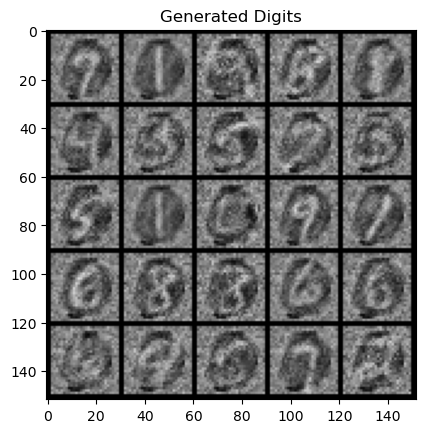

In [7]:
generate_digits(num_images=25)